In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

#Path and Dropping NaN values
path = r'../Life_Expectancy_preprocessed_final.csv'
data = pd.read_csv(path)
cleanData = data.dropna()

#Variables for Multiple Linear Regression
X = cleanData[['Adult Mortality','Alcohol','BMI','HIV/AIDS','thinness  1-19 years','thinness 5-9 years','Income composition of resources','Schooling']]
y = cleanData[['Life expectancy']]

#train_test_split method for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [28]:
from sklearn.linear_model import LinearRegression

#creating Linear Regression Model and fitting our Training Data
model = LinearRegression()
model.fit(X_train,y_train)

coef = model.coef_
intercept = model.intercept_

#Predict method to predict life expectancy age
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f"The Coefficient for the X values are: {coef}")
print(f"The Intercept is: {intercept}")

The Coefficient for the X values are: [[-0.01844706 -0.08640029  0.02580441 -0.42760102 -0.071718   -0.03784056
  10.36057283  1.11054548]]
The Intercept is: [53.15763654]


In [29]:
from sklearn.metrics import mean_squared_error, r2_score

#Finding MSE and R^2 on Training Data and Testing Data
mse_train = mean_squared_error(y_train,y_train_pred)
r2_train = r2_score(y_train,y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Mean Squared Error for train: {mse_train}")
print(f"R Squared for train: {r2_train}")

print(f"\nMean Squared Error for test: {mse_test}")
print(f"R Squared for test: {r2_test}")

Mean Squared Error for train: 14.15317119550465
R Squared for train: 0.8203859922972795

Mean Squared Error for test: 14.897970632597978
R Squared for test: 0.7902358564132361


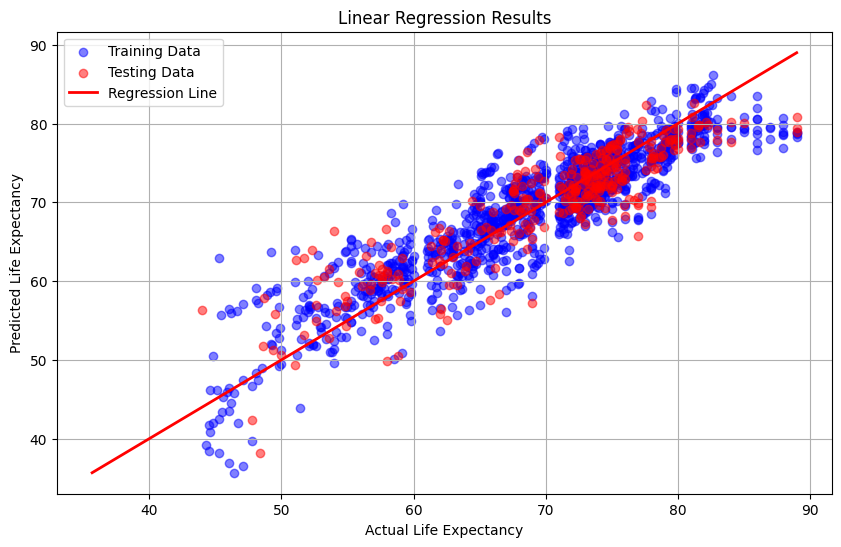

In [30]:
plt.figure(figsize=(10,6))

#Convert to Array so Matplotlib can be compatible with the Data
y_train = np.array(y_train)
y_test = np.array(y_test)
y_train_pred = np.array(y_train_pred)
y_test_pred = np.array(y_test_pred)

#Scatter plot for both training data and testing data
plt.scatter(y_train, y_train_pred, label='Training Data', color='blue', alpha=0.5)
plt.scatter(y_test, y_test_pred, label='Testing Data', color='red', alpha=0.5)

#Min and Max value for training and testing data
min_val = min(y_train.min(), y_test.min(), y_train_pred.min(), y_test_pred.min())
max_val = max(y_train.max(), y_test.max(), y_train_pred.max(), y_test_pred.max())

#Plotting the regression line
plt.plot([min_val, max_val], [min_val, max_val], color='red', linewidth=2, label='Regression Line')

plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.legend()
plt.title('Linear Regression Results')
plt.grid(True)
plt.show()

mprof: Sampling memory every 0.1s
running new process
running as a Python program...


/Users/jules/github/DataScience-Paper/.conda/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/Users/jules/github/DataScience-Paper/.conda/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/Users/jules/github/DataScience-Paper/.conda/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/Users/jules/github/DataScience-Paper/.conda/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/Users/jules/github/DataScience-Paper/.conda/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have vali

Filename: statistics/memoryAndCpu.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    18    135.0 MiB    135.0 MiB           1   @profile()
    19                                         def predict():
    20                                             # Set the current time
    21    135.0 MiB      0.0 MiB           1       current_time = time.time()
    22                                             # Loop the specified number of times
    23    135.2 MiB      0.0 MiB          11       for i in range(10):
    24                                                 # Make a prediction for the specified features.
    25    135.2 MiB      0.1 MiB          10           model.predict([[263, 62, 0.01, 71.27962362, 65, 1154, 19.1, 83, 6, 8.16, 65, 0.1, 584.25921, 33736494, 17.2, 17.3,0.479, 10.1]])
    26                                                 # Add the current time measurement to the list
    27    135.2 MiB      0.0 MiB          10           time_measurements.append(

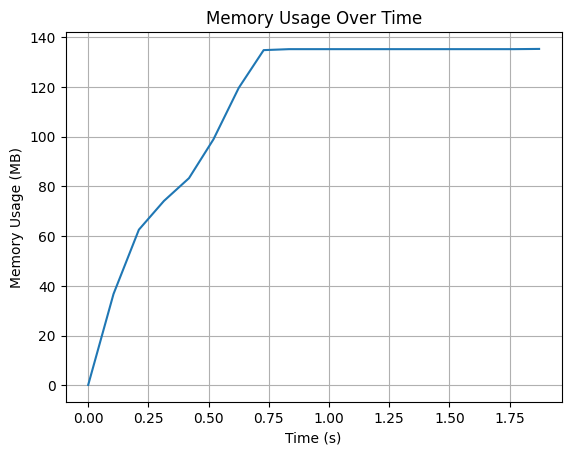

In [31]:
import os
import subprocess

# Run the script with memory profiling using subprocess
subprocess.run(['mprof', 'run', 'statistics/memoryAndCpu.py'])

# List all memory usage data files the output is structured like this: id filename time date
files = subprocess.check_output(['mprof', 'list']).decode('utf-8').strip().split('\n')

# Get the most recent memory usage data file (sorted by id)
filename = files[-1].split()[1]

# Read the memory usage data file
output = open(filename, 'rb').read()

# Clean up the memory usage data file by running it through mprof clean
os.system(f'mprof clean')

# Parse the memory data and extract memory usage values and timestamps
timestamps = []
memory_usages = []
first_timestamp = None

# Iterate through each line in the memory data
for line in output.decode('utf-8').strip().split('\n'):
    # Skip the first line
    if line.startswith('CMDLINE'):
        continue
    parts = line.strip().split()
    if len(parts) == 3:
        try:
            # Make the first timestamp 0
            if first_timestamp is None:
                first_timestamp = float(parts[2])
                
            # Calculate the timestamp and memory usage
            timestamp = float(parts[2]) - first_timestamp
            memory_usage = float(parts[1])
            timestamps.append(timestamp)
            memory_usages.append(memory_usage)
        except ValueError:
            pass  # Skip lines that don't have valid data

# Create a memory usage plot
plt.plot(timestamps, memory_usages)
plt.xlabel('Time (s)')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage Over Time')
plt.grid(True)

# Show the memory usage plot
plt.show()

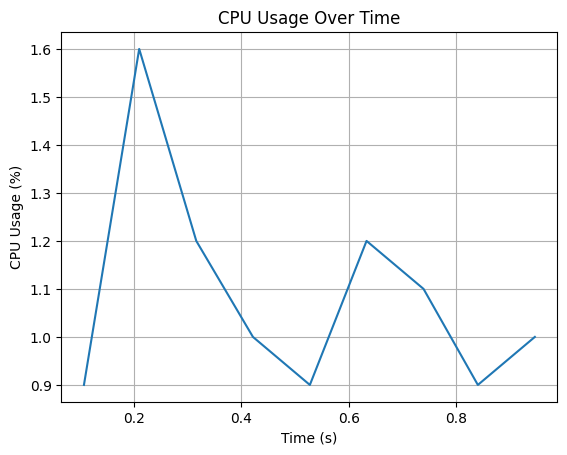

In [32]:
# Open the file cpu_usage_measurements.csv for reading
with open('cpu_usage_measurements.csv', 'r') as f:
    # Skip the first line
    f.readline()
    # Read all lines from the file into a list
    cpuLines = f.readlines()

# Open the file time_measurements.csv for reading
with open('time_measurements.csv', 'r') as f:
    # Skip the first line
    f.readline()
    # Read all lines from the file into a list
    timeLines = f.readlines()

# Delete the file time_measurements.csv
os.remove('time_measurements.csv')
# Delete the file cpu_usage_measurements.csv
os.remove('cpu_usage_measurements.csv')

# Make it a float
cpuLines = [float(line.strip()) for line in cpuLines]

timeLines = [float(line.strip()) for line in timeLines]



# Show the data on a plot
plt.plot(timeLines, cpuLines)
plt.xlabel('Time (s)')
plt.ylabel('CPU Usage (%)')
plt.title('CPU Usage Over Time')
plt.grid(True)

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

#Path and Dropping NaN values
# path = r'C:\Users\layoc\OneDrive\Documents\VSCodeLearn\Life Expectancy Data.csv'
# Change path to suit your local environment
data = pd.read_csv('LifeExpectancy.csv')
cleanData = data.dropna()

#Variables for Multiple Linear Regression
# or we can use an index to slice
X2 = cleanData[['Adult Mortality','infant deaths','Alcohol','percentage expenditure','Hepatitis B','Measles','BMI','under-five deaths','Polio','Total expenditure',
               'Diphtheria ','HIV/AIDS','GDP','Population','thinness  1-19 years','thinness 5-9 years','Income composition of resources','Schooling']]
y2 = cleanData[['Life expectancy']]

#train_test_split method for training and testing
X_train, X_test, y_train, y_test = train_test_split(X2,y2,test_size=0.2, random_state=42)


#Importing DecisionTreeRegressor so we can predict from class labels of data points instead of numerical
from sklearn.tree import DecisionTreeRegressor

treeReg = DecisionTreeRegressor(
    max_depth=5,              # Set the maximum depth of the tree
    min_samples_split=5,      # Set the minimum samples required to split a node
    min_samples_leaf=2,       # Set the minimum samples required in a leaf node
    max_leaf_nodes=None,      # Limit the maximum number of leaf nodes (optional)
    min_impurity_decrease=0.0)

treeReg.fit(X_train, y_train)

yTreeTest_pred = treeReg.predict(X_test)

FileNotFoundError: [Errno 2] No such file or directory: 'LifeExpectancy.csv'

In [ ]:
#MSE and R squared for test and train data for the DecisionTree
mse_treeTest = mean_squared_error(y_test, yTreeTest_pred)
r2_treeTest = r2_score(y_test, yTreeTest_pred)

print(f"Decision Tree testing data MSE: {mse_treeTest}")
print(f"Decision Tree testing R squared: {r2_treeTest}")

Decision Tree testing data MSE: 8.598027096245538
Decision Tree testing R squared: 0.8789393646384694


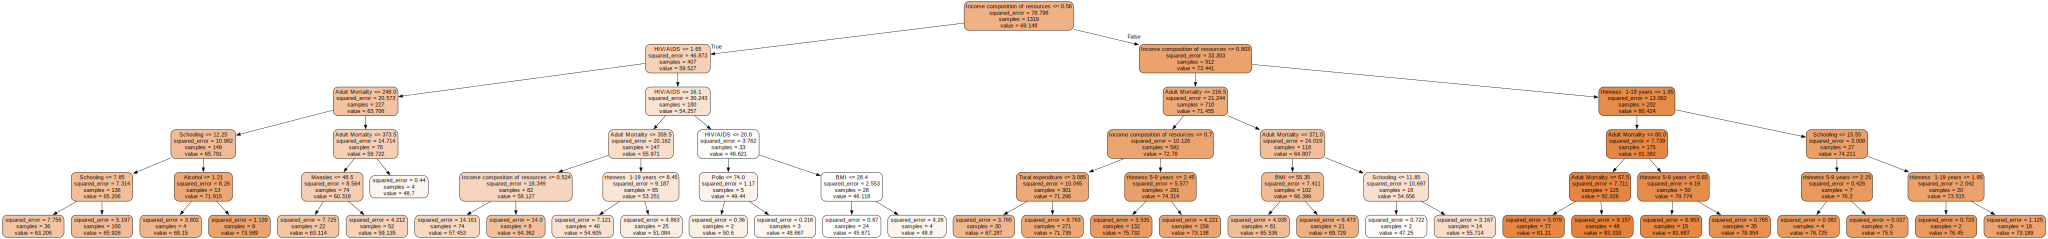

In [ ]:
from graphviz import Source
from sklearn.tree import export_graphviz
import graphviz

dotData = export_graphviz(
        treeReg,
        feature_names= X2.columns,
        class_names= y2,
        rounded=True,
        filled=True
    )

graphviz.Source(dotData)

In [ ]:
feature_importances = treeReg.feature_importances_

# Create a DataFrame to associate feature names with their importances
importance_df = pd.DataFrame({'Feature': X2.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print("Feature Importances:")
print(importance_df)

Feature Importances:
                            Feature  Importance
16  Income composition of resources    0.716993
0                   Adult Mortality    0.122254
11                         HIV/AIDS    0.118403
14             thinness  1-19 years    0.014717
17                        Schooling    0.009301
15               thinness 5-9 years    0.005899
9                 Total expenditure    0.005579
6                               BMI    0.003404
5                           Measles    0.002550
2                           Alcohol    0.000853
8                             Polio    0.000047
7                 under-five deaths    0.000000
1                     infant deaths    0.000000
10                      Diphtheria     0.000000
4                       Hepatitis B    0.000000
12                              GDP    0.000000
13                       Population    0.000000
3            percentage expenditure    0.000000


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
bestTreeReg = DecisionTreeRegressor()

param_grid = {
    'max_depth':[3,4,5,6],         # Set the maximum depth of the tree
    'max_leaf_nodes':[None,6,7],   # Limit the maximum number of leaf nodes (optional)
    'min_samples_split':[2,3,4],   # Set the minimum samples required to split a node
    'min_samples_leaf':[1,2,3,4,5] # Set the minimum samples required in a leaf node
    }

In [ ]:
grid_search = GridSearchCV(bestTreeReg, param_grid = param_grid, cv = 5, scoring = 'r2', refit=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_leaf_nodes': [None, 6, 7],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4]},
             scoring='r2')

In [ ]:
print('best parameters : ', grid_search.best_params_)
print('best score : ', round(grid_search.best_score_, 4))

best parameters :  {'max_depth': 6, 'max_leaf_nodes': None, 'min_samples_leaf': 4, 'min_samples_split': 4}
best score :  0.9022


In [ ]:
bestTree = DecisionTreeRegressor(
    max_depth=6,                  # Set the maximum depth of the tree
    min_samples_split=2,          # Set the minimum samples required to split a node
    min_samples_leaf=4,           # Set the minimum samples required in a leaf node
    max_leaf_nodes=None,          # Limit the maximum number of leaf nodes (optional)
    min_impurity_decrease=0.0)


bestTree.fit(X_train, y_train)

best_pred = bestTree.predict(X_test)

In [ ]:
#MSE and R squared for test and train data for the DecisionTree
mse_treeTest = mean_squared_error(y_test, best_pred)
r2_treeTest = r2_score(y_test, best_pred)

print(f"Best Decision Tree testing data MSE: {mse_treeTest}")  # or we can use RMSE
print(f"Best Decision Tree testing R score: {r2_treeTest}")

Best Decision Tree testing data MSE: 8.181415747720123
Best Decision Tree testing R score: 0.8848052724783428


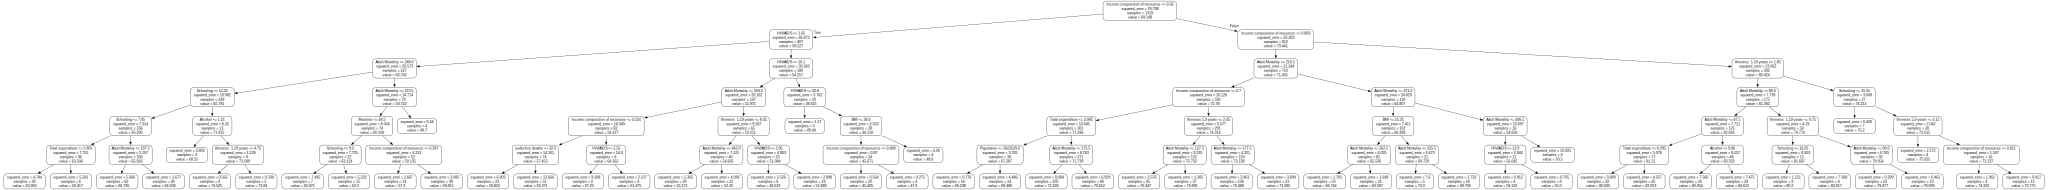

In [ ]:
dot_data = export_graphviz(
    bestTree,
    feature_names = X2.columns,
    class_names = y2,
    rounded=True
)

graphviz.Source(dot_data) 

In [ ]:
feature_importances = bestTree.feature_importances_

# Create a DataFrame to associate feature names with their importances
importance_df = pd.DataFrame({'Feature': X2.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print("Feature Importances:")
print(importance_df)

Feature Importances:
                            Feature  Importance
16  Income composition of resources    0.704633
0                   Adult Mortality    0.131554
11                         HIV/AIDS    0.117702
14             thinness  1-19 years    0.015117
17                        Schooling    0.008759
9                 Total expenditure    0.007320
15               thinness 5-9 years    0.005080
6                               BMI    0.003341
5                           Measles    0.002503
7                 under-five deaths    0.001965
2                           Alcohol    0.001641
13                       Population    0.000386
8                             Polio    0.000000
1                     infant deaths    0.000000
10                      Diphtheria     0.000000
4                       Hepatitis B    0.000000
12                              GDP    0.000000
3            percentage expenditure    0.000000
